In [2]:
import pandas as pd
import numpy as np

# Load data from Excel file
file_path = "/content/Lab Session1 Data.xlsx"
df = pd.read_excel(file_path, sheet_name='Purchase data').iloc[:, :5]

# Extract matrices A and C from the loaded data
A = df.iloc[:, 1:4]  # Matrix A represents the features of the purchased products
C = df.iloc[:, 4]    # Matrix C represents the total cost for each purchase transaction

# Display matrices A and C
print("Matrix A (Product Features):")
print(A)
print("\nMatrix C (Total Cost):")
print(C)

# Display dimensionality of the vector space
dimensionality = A.shape[1]
print(f"\nDimensionality of the vector space: {dimensionality}")

# Display the number of vectors in the vector space
num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

# Calculate the rank of matrix A
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

# Using Pseudo-Inverse to find the cost of each product
A_pseudo_inverse = np.linalg.pinv(A)
product_costs = np.dot(A_pseudo_inverse, C)

# Display the cost of each product
print("\nEstimated Cost of Each Product:")
for i, cost in enumerate(product_costs):
    print(f"Product {i+1}: {cost}")


Matrix A (Product Features):
   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4

Matrix C (Total Cost):
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64

Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3

Estimated Cost of Each Product:
Product 1: 0.9999999999999989
Product 2: 54.99999999999999
Product 3: 18.0


In [3]:
import pandas as pd
import numpy as np

def euclidean_distance(x1, x2):
    # Calculate the Euclidean distance between two data points
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))

def k_nearest_neighbors(training_data, labels, query, k):
    # Calculate distances from the query point to all points in the training data
    distances = [euclidean_distance(query, data) for data in training_data]

    # Find the indices of the k-nearest neighbors
    nearest_indices = np.argsort(distances)[:k]

    # Get the labels of the k-nearest neighbors
    nearest_labels = [labels[i] for i in nearest_indices]

    # Predict the label based on majority voting among the neighbors
    predicted_label = max(set(nearest_labels), key=nearest_labels.count)

    return predicted_label

def load_data(file_path):
    # Load data from an Excel file and return the DataFrame
    return pd.read_excel(file_path)

if __name__ == "__main__":
    # Specify the file path containing the data
    file_path = "/content/Lab Session1 Data.xlsx"

    # Load the data into a DataFrame
    df = load_data(file_path)

    # Categorize customers as WEALTHY or LESS AFFLUENT based on their payment amounts
    df['Class'] = np.where(df['Payment (Rs)'] > 200, 'WEALTHY', 'LESS AFFLUENT')

    # Extract features and target variable
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Class'].values

    # Define training data and corresponding labels
    training_data = X
    labels = y

    # Define the customer to be classified
    query_customer = [25, 1, 2]

    # Set the number of neighbors to consider
    k = 3

    # Predict the class for the given customer using k-nearest neighbors
    predicted_class = k_nearest_neighbors(training_data, labels, query_customer, k)
    print("Predicted customer class:", predicted_class)


Predicted customer class: LESS AFFLUENT


1. Mean of Price: 1560.663453815261
   Variance of Price: 58732.365352539186
2. Sample Mean of Wednesday Prices: 1550.706
3. Sample Mean of April Prices: 1698.9526315789474
4. Probability of making a loss: 0.4979919678714859
5. Probability of making a profit on Wednesday: 0.5
6. Conditional Probability of making profit given today is Wednesday: 0.01


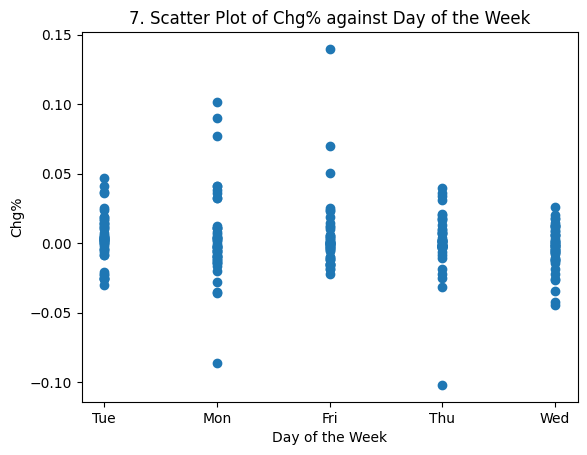

In [4]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = '/content/Lab Session1 Data.xlsx'
df_stock = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Question 1: What is the mean and variance of the Price data?
price_mean = statistics.mean(df_stock['Price'])
price_variance = statistics.variance(df_stock['Price'])

print(f"1. Mean of Price: {price_mean}")
print(f"   Variance of Price: {price_variance}")

# Question 2: What is the sample mean of the Price data for all Wednesdays?
wednesday_prices = df_stock[df_stock['Day'] == 'Wed']
wednesday_prices = wednesday_prices['Price']
wednesday_mean = statistics.mean(wednesday_prices)

print(f"2. Sample Mean of Wednesday Prices: {wednesday_mean}")

# Question 3: What is the sample mean of the Price data for the month of April?
april_prices = df_stock[df_stock['Month'] == 'Apr']
april_prices = april_prices['Price']
april_mean = statistics.mean(april_prices)

print(f"3. Sample Mean of April Prices: {april_mean}")

# Question 4: What is the probability of making a loss over the stock?
loss_probability = len(df_stock[df_stock['Chg%'] < 0]) / len(df_stock)
print(f"4. Probability of making a loss: {loss_probability}")

# Question 5: What is the probability of making a profit on Wednesdays?
wednesday_profit_probability = len(wednesday_prices[wednesday_prices.diff() > 0]) / len(wednesday_prices)
print(f"5. Probability of making a profit on Wednesday: {wednesday_profit_probability}")

# Question 6: What is the conditional probability of making a profit given today is Wednesday?
conditional_profit_given_wednesday = wednesday_profit_probability / len(df_stock[df_stock['Day'] == 'Wed'])
print(f"6. Conditional Probability of making profit given today is Wednesday: {conditional_profit_given_wednesday}")

# Question 7: What does the scatter plot of Chg% data against the day of the week reveal?
plt.scatter(df_stock['Day'], df_stock['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('7. Scatter Plot of Chg% against Day of the Week')
plt.show()
